In [1]:
#Sobel filter

import cv2
import numpy as np
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
# It is used depth of cv2.CV_64F.
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# Kernel size can be: 1,3,5 or 7.
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

sobel_horizontal_abs = np.absolute(sobel_horizontal)
sobel_horizontal_8u = np.uint8(sobel_horizontal_abs)

sobel_vertical_abs = np.absolute(sobel_vertical)
sobel_vertical_8u = np.uint8(sobel_vertical_abs) # 0-255

cv2.imshow('Original', img)
cv2.imshow('Sobel horizontal', sobel_horizontal_8u)
cv2.imshow('Sobel vertical', sobel_vertical_8u)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#canny edge detector

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lena.png')
#sigma to detect fine/coarse feature
image = cv2.GaussianBlur(image,(3,3),0)
edges = cv2.Canny(image, 50, 150)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('original')
plt.imshow(image[:,:,[2,1,0]]) # BGR -> RGB

plt.subplot(1,2,2)
plt.axis('off')
plt.title('edges')
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

Detected line: (99 399) (401 351)
Detected circle: center=(200.5 199.5), radius=68.19999694824219


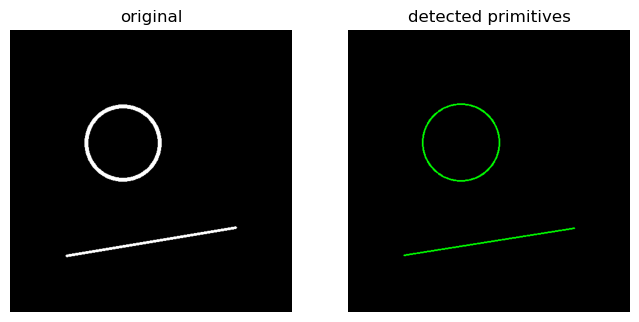

In [2]:
#Hough transform

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((500, 500), np.uint8)  # 建立全白的影像 500 * 500
cv2.circle(img, (200, 200), 65, 255, 5)  # 畫出圓形 : 圓心、半徑、顏色、寬度
cv2.line(img, (100, 400), (400, 350), 255, 3)

#be careful: HoughLinesP and HoughCircles return one more dimension, so [0] is necessary
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]     # 找線段位置: 來源影像, 解析度, ........
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=100,param2=30,minRadius=30,maxRadius=200)[0]

dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
for x1, y1, x2, y2 in lines:
    print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
    cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
for c in circles:
    print('Detected circle: center=({} {}), radius={}'.format(c[0], c[1], c[2]))
    cv2.circle(dbg_img, (int(c[0]), int(c[1])), int(c[2]), (0, 255, 0), 2)
                           
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('detected primitives')
plt.axis('off')
plt.imshow(dbg_img)
plt.show()


###### %%writefile test
## Practice
1. Input images from red_blood_cell.jpg.
2. Use morphological filters to remove noise.
3. Use <i>cv2.HoughCircles()</i> to detect circles.
4. Count automatically how many cells in the image.
5. Optional:Show each individual circle using different color.
6. Use <i>cv2.putText()</i> to write the number of cells on the upper left corner.
7. Show the output image.
8. Upload your Jupyter code file (*.ipynb)
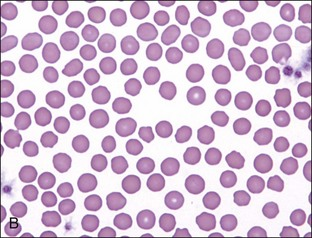

In [ ]:
import cv2
image = cv2.imread('red_blood_cell.jpg')
cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

129


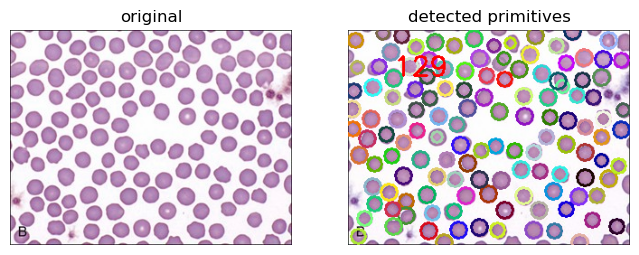

In [149]:
#Hough transform

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('red_blood_cell.jpg')
g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
g = cv2.GaussianBlur(g,(3,3),2)
#retval, g = cv2.threshold(g, 140, 255, cv2.THRESH_TOZERO)
# cv2.imshow('img',g)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#be careful: HoughLinesP and HoughCircles return one more dimension, so [0] is necessary
circles = cv2.HoughCircles(g, cv2.HOUGH_GRADIENT, 1, 6, param1=4,param2=15,minRadius=6,maxRadius=10)[0]
color = []
for i in range(135):
    color.append((random.randint(0,255),random.randint(1,255),random.randint(1,255)))
dbg_img = np.copy(image)
count = 0
for c in circles:
    count += 1
    #print('Detected circle: center=({} {}), radius={}'.format(c[0], c[1], c[2]))
    cv2.circle(dbg_img, (int(c[0]), int(c[1])), int(c[2]), color[count], 2)
print(count) 
cv2.putText(dbg_img,str(count),(50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),2)
cv2.imshow('img',dbg_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.title('detected primitives')
plt.axis('off')
dbg_img = cv2.cvtColor(dbg_img, cv2.COLOR_BGR2RGB)
plt.imshow(dbg_img)
plt.show()